# Aula 8: Projeto de Ciência de Dados

Francisco Aparecido Rodrigues, francisco@icmc.usp.br.<br>
Universidade de São Paulo, São Carlos, Brasil.<br>
Copyright (c) 2021.

<hr>

Agora que vimos os conceitos básicos de Ciência de Dados, estamos prontos para desenvolver um projeto completo. As fases envolvidas no processo podem ser resumidas nos seguintes passos:<br>
1 - Formulação do problema e preparo dos dados.<br>
2 - Limpeza e normalização dos dados<br>
3 - Análise exploratória, Estatística Descritiva, PCA.<br>
4 - Aprendizado supervisionado através da validação cruzada (conjunto de teste).<br>
5 - Treinamento do modelo com todos os dados de treinamento.<br>
6 - Predição dos valores no conjunto de teste. <br>
7 - Avaliação do modelo.<br>
8 - Interpretação dos resultados.

Nessa aula, vamos considerar todos esses passos, de modo a construir um projeto de Ciência de Dados típico.

Vamos considerar o problema de classificação dos passageiros do Titanic disponível no portal Kaggle: https://www.kaggle.com/c/titanic. Ou seja, objetivamos construir um projeto para classificar os dados e posterior submissão, de modo a verificar o quão preciso são nossos resultados comparados com soluções de outros usuários. Vamos mostrar todas as fases do projeto e os resultados, mas lembramos que essa é uma possível solução. Um cientista de dados deve aprender com os erros e sempre tentar melhorar um projeto, aprendendo em todas as fases de seu desenvolvimento. 

## Formulação do problema e leitura dos dados

Vamos considerar a base de dados de passageiros que viajaram no Titanic. 

Os atributos contidos nos dados:<br>
1 - PassengerId: Número de identificação do passageiro;<br>
2 - Survived: Indica se o passageiro sobreviveu ao desastre. É atribuído o valor de 0 para aqueles que não sobreviveram, e 1 para quem sobreviveu;<br>
3 - Pclass: Classe na qual o passageiro viajou. É informado 1 para primeira classe; 2 para segunda; e 3 para terceira;<br>
4 - Name: Nome do passageiro;<br>
5 - Sex: Sexo do passageiro;<br>
6 - Age: Idade do passageiro em anos;<br>
7 - SibSp: Quantidade de irmãos e cônjuges a bordo;<br>
8 - Parch: Quantidade de pais e filhos a bordo;<br>
9 - Ticket: Número da passagem;<br>
10 - Fare: Preço da passagem;<br>
11 - Cabin: Número da cabine do passageiro;<br>
12 - Embarked: Indica o porto no qual o passageiro embarcou. Há apenas três valores possíveis: Cherbourg, Queenstown e Southampton, indicados pelas letras “C”, “Q” e “S”, respectivamente. 

Nosso objetivo é classificar os passageiros como sobreviventes (ou não) de acordo com o conjunto de atributos.

Fazendo a leitura dos dados:

In [2]:
import random
random.seed(42) # define the seed (important to reproduce the results)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


train = pd.read_csv('data/titanic/train.csv', header=(0))
test = pd.read_csv('data/titanic/test.csv', header=(0))

print("Número de linhas e colunas no conjunto de treinamento:", train.shape)
print("Número de linhas e colunas no conjunto de teste:", test.shape)
attributes = list(train.columns)
train.head(10)

Número de linhas e colunas no conjunto de treinamento: (891, 12)
Número de linhas e colunas no conjunto de teste: (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Notem que temos um conjunto de treinamento, que geralmente temos acesso em projetos de Ciência de Dados, e um conjunto de teste, que representa a aplicação de nosso modelo desenvolvido. É importante notar que, na prática, não vamos conhecer os resultados de problemas de classificação ou regressão, isto é, a saída $y$. No entanto, em nosso exemplo vamos poder submeter as soluções (a classificação do conjunto de teste) e verificar o quão boa é a nossa metodologia, comparando ainda com outras soluções apresentadas no site Kaggle. Em casos reais, as predições também poderão ser comparadas com resultados de casos desconhecidos ou predições futuras, como no caso de diagnóstico de doenças ou predição de preços no mercado de ações.

O conjunto de teste não contém as classes, que devemos inferir.

In [3]:
print('Conjunto de teste')
test.head(10)

Conjunto de teste


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


Após a leitura dos dados e formualação dos problemas, podemos passar à fase de pré-processamento.

## Limpeza e normalização dos dados

Vemos que alguns atributos são irrelavantes, como PassengerId, Name, Ticket e Cabin. Vamos retirar esses atributos dos conjuntos de teste e treinamento. No entanto, usaremos o atributo PassengerId quando formos submeter nossa solução no Kaggle.

In [4]:
train.drop(['PassengerId','Name', 'Ticket', 'Cabin'],axis = 1, inplace = True)
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [5]:
PassengerId_test = test['PassengerId']
test.drop(['PassengerId','Name', 'Ticket', 'Cabin'],axis = 1, inplace = True)
test.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
5,3,male,14.0,0,0,9.2250,S
6,3,female,30.0,0,0,7.6292,Q
7,2,male,26.0,1,1,29.0000,S
8,3,female,18.0,0,0,7.2292,C
9,3,male,21.0,2,0,24.1500,S


Os atributos nominais podem ser transformados para numéricos usando one-hot-enconding.

In [6]:
train = pd.get_dummies(train)
train.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
5,0,3,NaN,0,0,8.4583,0,1,0,1,0
6,0,1,54.0,0,0,51.8625,0,1,0,0,1
7,0,3,2.0,3,1,21.0750,0,1,0,0,1
8,1,3,27.0,0,2,11.1333,1,0,0,0,1
9,1,2,14.0,1,0,30.0708,1,0,1,0,0


In [7]:
test = pd.get_dummies(test)
test.head(10)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1
5,3,14.0,0,0,9.2250,0,1,0,0,1
6,3,30.0,0,0,7.6292,1,0,0,1,0
7,2,26.0,1,1,29.0000,0,1,0,0,1
8,3,18.0,0,0,7.2292,1,0,1,0,0
9,3,21.0,2,0,24.1500,0,1,0,0,1


O conjunto de dados pode apresentar valores nulos (not a number: nan). A sua identificação pode ser feita usando métodos da biblioteca Pandas.

In [8]:
train.isnull().sum().sort_values(ascending=False).head(10)

Age           177
Survived        0
Pclass          0
SibSp           0
Parch           0
Fare            0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
dtype: int64

In [9]:
test.isnull().sum().sort_values(ascending=False).head(10)

Age           86
Fare           1
Pclass         0
SibSp          0
Parch          0
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

Se removermos a linhas com esses valores, vamos perder uma grande quantidade de dados. Para não descartamos as observações que contém nan, vamos atribuir valores médios às entradas nulas.

In [10]:
train['Age'] = train['Age'].fillna(train['Age'].mode()[0])
test['Age'] = test['Age'].fillna(test['Age'].mode()[0])
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

Podemos verificar se os dados ainda contém valores nulos.

In [11]:
train.isnull().sum().sort_values(ascending=False).head(10)

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
dtype: int64

In [12]:
test.isnull().sum().sort_values(ascending=False).head(10)

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

Para facilitar o processamento, vamos converter os dados para o formato numpy para podemos realizar a classificação.

In [13]:
data_train = train.to_numpy()
nrow,ncol = data_train.shape
y = data_train[:,0]
X = data_train[:,1:ncol]

Para o conjunto de teste:

In [14]:
data_test = test.to_numpy()
X_test = data_test

Os dados podem ser normalizados, de modo a evitar o efeito da escala dos atributos nos métodos de aprendizado.

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

X_test = scaler.transform(X_test)

print('Dados transformados:')
print('Media: ', np.mean(X, axis = 0))
print('Desvio Padrao:', np.std(X, axis = 0))

Dados transformados:
Media:  [-8.77213254e-17  5.98099946e-17  4.38606627e-17  5.38289951e-17
  3.98733297e-18  3.98733297e-17 -1.15632656e-16 -1.99366649e-17
  0.00000000e+00 -4.98416622e-17]
Desvio Padrao: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Vamos verificar se as classes estão balanceadas.

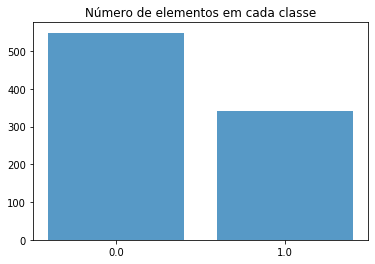

In [16]:
#classes = train[train.columns[0]]
classes = y
cl = np.unique(classes)
ncl = np.zeros(len(cl))
for i in np.arange(0, len(cl)):
    a = classes == cl[i]
    ncl[i] = len(classes[a])
    
numbers = np.arange(0, len(cl))
plt.bar(numbers, ncl,  alpha=.75)
plt.xticks(numbers, cl)
plt.title('Número de elementos em cada classe')
plt.show(True)

Ou seja, há mais sobreviventes do que não-sobrevivente. Essa informação será importante na validação cruzada.

## Análise descritiva dos dados

Podemos ter uma ideia da separação entre as classes realizando a projeção dos atributos em duas dimensões usando PCA.

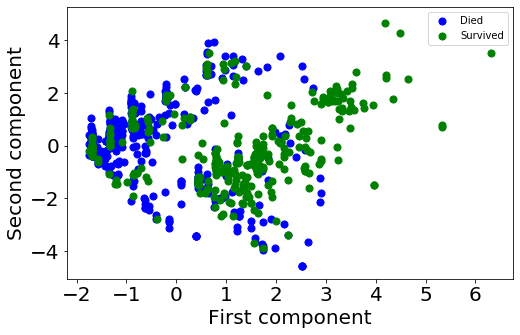

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

classes = np.unique(y)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
aux = 0
plt.figure(figsize=(8,5))
for c in classes:
    if c == 1:
        lb = 'Survived'
    else:
        lb = 'Died'
    nodes = np.where(y == c)
    plt.scatter(pca_result[nodes,0], pca_result[nodes,1], s=50, color = colors[aux], label = lb)
    aux = aux + 1
plt.legend()
plt.xlabel("First component", fontsize=20)
plt.ylabel("Second component", fontsize=20)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.show(True)

Vemos que em duas dimensões, a separação não é clara. Além disso, podemos identificar os atributos que mais explicam a variância nos dados.

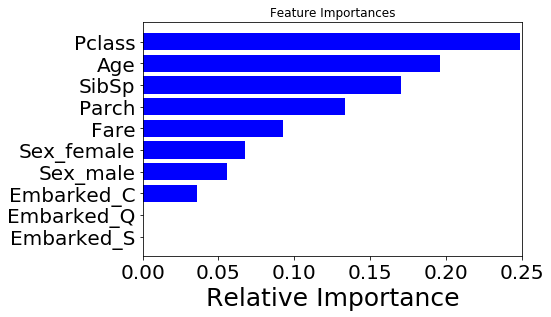

In [18]:
pca = PCA()
pca_result = pca.fit_transform(X)
var_exp = pca.explained_variance_ratio_

importances = var_exp
attributes = train.columns[1:len(train.columns)]
indices = np.argsort(importances)
attributes_rank = []
for i in indices:
    attributes_rank.append(attributes[i])
plt.title('Feature Importances')
plt.tight_layout()
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), attributes_rank, fontsize=25)
plt.xlabel('Relative Importance',fontsize=25)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.xlim([0.0, 0.25])
plt.show()

Ou seja, a classe na qual o passageiro viajou , a idade e quantidade de irmãos e cônjuges a bordo são os atributos mais explicam a variabilidade dos dados, sendo, portanto, os mais importantes para descrever os dados.

Podemos verificar como a variância muda de acordo com o número de componentes. 

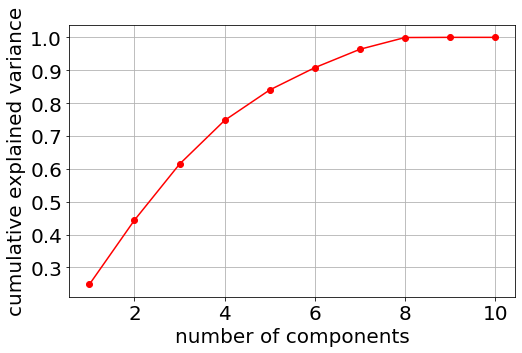

In [19]:
pca = PCA().fit(X)
plt.figure(figsize=(8,5))
ncomp = np.arange(1, np.shape(X)[1]+1)
plt.plot(ncomp, np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('number of components', fontsize=20)
plt.ylabel('cumulative explained variance', fontsize=20);
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.grid(True)
plt.show(True)

Notamos que com 6 componentes explicamos cerca de 90% dos dados. No entanto, como o número de atributos não é elevado, vamos considerar os dados sem seleção dos atributos principais, ou seja, os dados sem usar a projeção.

Podemos também analisar o nível de correlação nos dados.

In [ ]:
corr = train.corr()
#Plot Correlation Matrix using Matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='Blues', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation between variables', fontsize=15, fontweight='bold')
plt.grid(False)
plt.show()

Vemos que os atributos não são fortemente correlacionados. Além disso, vemos que as mulheres tiverem maior chance de sobreviver do que os homens.

## Classificação

Vamos comparar diversos métodos de classificação, usando validação cruzada. Como os dados são desbalanceados, precisamos levar essa informação em conta na validação. Para mediar a precisão da classificação, podemos usar a área sobre a curva Roc (AUC). Vamos comparar vários classificadores.

Inicialmente, vamos considerar o métodos mais simples, o k-vizinhos mais próximos. Usando validação cruzada, podemos encontrar o melhor valor de k.

Melhor k: 14  AUC: 0.7950663497722321


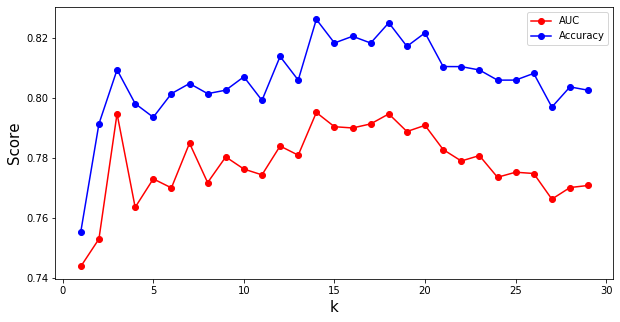

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
#cv = KFold(n_splits=10)
# enumerate the splits and summarize the distributions
mauc = []
macc = []
vk = []
for k in range(1, 30):
    vauc = []
    vacc = []
    for train_index, test_index in cv.split(X, y):
        # select rows
        x_train, x_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test) 
        score = accuracy_score(y_pred, y_test)

        vauc.append(roc_auc_score(y_test, y_pred))
        vacc.append(accuracy_score(y_pred, y_test))
    macc.append(np.mean(vacc))
    mauc.append(np.mean(vauc))
    vk.append(k)
    #print('k:', k)
    #print('Average accuracy:', np.mean(vacc))
    #print('Average AUC:', np.mean(vauc))
best_k = np.argmax(mauc)+1
print('Melhor k:', best_k, ' AUC:',mauc[best_k-1])
plt.figure(figsize=(10,5))
plt.plot(vk, mauc, '-ro', label= 'AUC')
plt.plot(vk, macc, '-bo', label = 'Accuracy')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.legend()
plt.show()

Após encontrar o melhor valor de $k$, podemos fazer a classificação usando o método dos k-vizinhos nos dados desconhecidos. Os resultados serão gravados em um arquivo para submetermos ao Kaggle.

Podemos avaliar a classificação usando outras medidas, além da acurácia:

In [21]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
model.fit(x_train,y_train)
y_pred = model.predict(x_test) 
score = accuracy_score(y_pred, y_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average="macro"))
print('Precision:', precision_score(y_test, y_pred, average="macro"))
print('Recall:', recall_score(y_test, y_pred, average="macro"))

Accuracy: 0.8089887640449438
F1 score: 0.7911663216011041
Precision: 0.8123536299765808
Recall: 0.7822751322751322


Gravando os resultados para submissão no Kaggle.

In [22]:
model = KNeighborsClassifier(n_neighbors=best_k, metric = 'euclidean')
model.fit(X,y)

y_pred = model.predict(X_test) 
y_pred = np.array(y_pred, dtype = int)
prediction = pd.DataFrame()
prediction['PassengerId'] = PassengerId_test
prediction['Survived'] = y_pred

prediction.to_csv('Titanic-kn.csv', index = False)

Enviando nossa solução para o Kaggle, obtemos: **Your submission scored 0.77033**

Vamos usar floresta aleatória.

Melhor n: 22  AUC: 0.7990525705231588


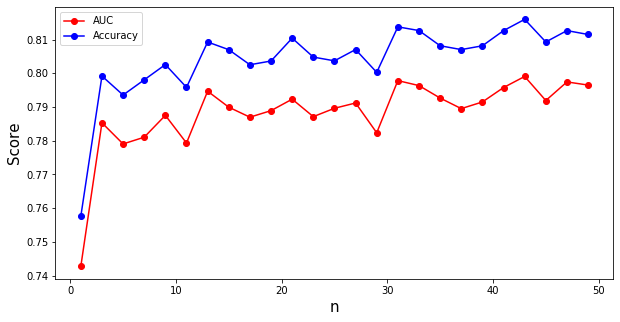

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
#cv = KFold(n_splits=10)
# enumerate the splits and summarize the distributions
mauc = []
macc = []
vn = []
for n in range(1, 50,2):
    vauc = []
    vacc = []
    for train_index, test_index in cv.split(X, y):
        # select rows
        x_train, x_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = RandomForestClassifier(n_estimators=n)
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test) 
        score = accuracy_score(y_pred, y_test)

        vauc.append(roc_auc_score(y_test, y_pred))
        vacc.append(accuracy_score(y_pred, y_test))
    macc.append(np.mean(vacc))
    mauc.append(np.mean(vauc))
    vn.append(n)
best_n = np.argmax(mauc)+1
print('Melhor n:', best_n, ' AUC:',mauc[best_n-1])
plt.figure(figsize=(10,5))
plt.plot(vn, mauc, '-ro', label= 'AUC')
plt.plot(vn, macc, '-bo', label = 'Accuracy')
plt.xlabel('n', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.legend()
plt.show()

Realizando a classificação final e gravando o resultado em um arquivo:

In [24]:
model = RandomForestClassifier(n_estimators=best_n)
model.fit(x_train,y_train)
y_pred = model.predict(X_test) 
y_pred = np.array(y_pred, dtype = int)
prediction = pd.DataFrame()
prediction['PassengerId'] = PassengerId_test
prediction['Survived'] = y_pred

prediction.to_csv('Titanic-RF.csv', index = False)

Após submter, obtemos: **Your submission scored 0.75119**, que é pior que o caso anterior.

O classificar random forest permite ainda ordenar os atributos de acordo com a sua importância.

In [ ]:
importances = model.feature_importances_
attributes = train.columns[1:len(train.columns)]
indices = np.argsort(importances)
attributes_rank = []
for i in indices:
    attributes_rank.append(attributes[i])
plt.title('Feature Importances')
plt.tight_layout()
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), attributes_rank, fontsize=25)
plt.xlabel('Relative Importance',fontsize=25)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.xlim([0.0, 0.25])
plt.show()

In [7]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
random.seed(42) # define the seed (important to reproduce the results)

data = pd.read_csv('../data/Vehicle.csv', header=(0))

# remove NaN
data = data.dropna(axis='rows') #
# armazena o nome das classes
classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)  #name of the clases
features_names = data.columns

data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

scaler = StandardScaler().fit(X)
X = scaler.transform(X)
 

p = 0.2 # fracao de elementos no conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

model = RandomForestClassifier(n_estimators=best_n)
model.fit(x_train,y_train)
importances = model.feature_importances_
attributes = train.columns[1:len(train.columns)]
indices = np.argsort(importances)
attributes_rank = []
for i in indices:
    attributes_rank.append(attributes[i])
plt.title('Feature Importances')
plt.tight_layout()
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), attributes_rank, fontsize=25)
plt.xlabel('Relative Importance',fontsize=25)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.xlim([0.0, 0.25])
plt.show()

NameError: name 'best_n' is not defined

Vemos que os classificadores fornecem resultados bastante parecidos, quando submetemos no Kaggle.

Para tentarmos melhorar a classificação, temos que considerar outras estratégias. Vamos usar um número menor de atributos. Vamos escolher de acordo com a saída do random forest, mas podemos usar outros critérios para escolher os atributos.

In [26]:
selected_attributes = ['Fare', 'Age','Sex_male', 'Sex_female','Pclass', 'SibSp']
data_train = train[selected_attributes]
data_train = data_train.to_numpy()
X = data_train

data_test = test[selected_attributes]
data_test = data_test.to_numpy()
X_test = data_test


Padronizando os dados.

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

X_test = scaler.transform(X_test)

print('Dados transformados:')
print('Media: ', np.mean(X, axis = 0))
print('Desvio Padrao:', np.std(X, axis = 0))

Dados transformados:
Media:  [ 3.98733297e-18  5.98099946e-17 -1.15632656e-16  3.98733297e-17
 -8.77213254e-17  4.38606627e-17]
Desvio Padrao: [1. 1. 1. 1. 1. 1.]


Melhor n: 25  AUC: 0.8082695300342359


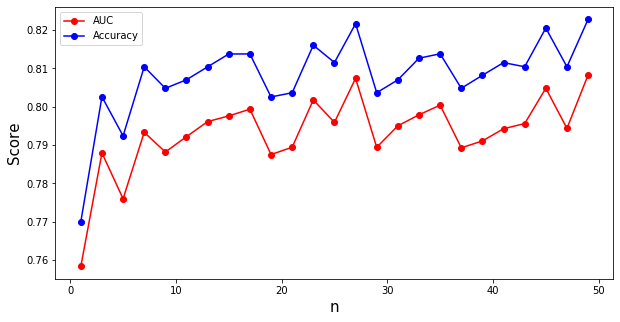

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
#cv = KFold(n_splits=10)
# enumerate the splits and summarize the distributions
mauc = []
macc = []
vn = []
for n in range(1, 50,2):
    vauc = []
    vacc = []
    for train_index, test_index in cv.split(X, y):
        # select rows
        x_train, x_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = RandomForestClassifier(n_estimators=n)
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test) 
        score = accuracy_score(y_pred, y_test)

        vauc.append(roc_auc_score(y_test, y_pred))
        vacc.append(accuracy_score(y_pred, y_test))
    macc.append(np.mean(vacc))
    mauc.append(np.mean(vauc))
    vn.append(n)
best_n = np.argmax(mauc)+1
print('Melhor n:', best_n, ' AUC:',mauc[best_n-1])
plt.figure(figsize=(10,5))
plt.plot(vn, mauc, '-ro', label= 'AUC')
plt.plot(vn, macc, '-bo', label = 'Accuracy')
plt.xlabel('n', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.legend()
plt.show()

Preparando para a submissão.

In [30]:
model = RandomForestClassifier(n_estimators=best_n)
model.fit(x_train,y_train)
y_pred = model.predict(X_test) 
y_pred = np.array(y_pred, dtype = int)
prediction = pd.DataFrame()
prediction['PassengerId'] = PassengerId_test
prediction['Survived'] = y_pred

prediction.to_csv('Titanic-RF2.csv', index = False)

Score: 0.74641

Como o SVM fornceu o melhor resultado, vamos usar esse classificador, mas variando ainda mais os atributos usando a função gridsearch.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
parameters = {'kernel':('linear', 'rbf'), 'C':[1,2,5,10,20,30, 50], 'gamma':['auto']}
svc = svm.SVC()
model = GridSearchCV(svc, parameters, cv = 5)
model.fit(X,y)
print('Best parameters:', model.best_params_)

y_pred = model.predict(X_test) 
y_pred = np.array(y_pred, dtype = int)
prediction = pd.DataFrame()
prediction['PassengerId'] = PassengerId_test
prediction['Survived'] = y_pred
prediction.to_csv('Titanic-SVM.csv', index = False)

print("Grid scores on development set:")
print()
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, model.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
print()

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.array(y_pred, dtype = int)
prediction = pd.DataFrame()
prediction['PassengerId'] = PassengerId_test
prediction['Survived'] = y_pred

prediction.to_csv('Titanic-SVM.csv', index = False)

Após submter, obtemos: **Your submission scored 0.76076**, que é pior que o caso anterior.

Ou seja, escolhendo um número menor de atributos não melhorou a classificação.

Podemos ainda tentar usar outros métodos de classificação, usar normalização ao invés da padronização, selecionar outros atributos e variar ainda mais os parâmetros dos modelos de classificação. Como exercício de fixação, sugerimos utilizar esses métodos para tentar melhorar a classificação, submetendo seus resultados no Kaggle.

### Exercícios de fixação

Tente melhorar a classificação no Kaggle.